In [1]:
!pip install mediapipe opencv-python

In [2]:
!pip install celluloid

In [3]:
!pip install scipy

In [4]:
!pip install pyshine

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from mpl_toolkits import mplot3d
from celluloid import Camera
from scipy import spatial
import pyshine as ps

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

Warning! No module named 'sounddevice'


In [2]:
def calculateAngle(a,b,c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    radians =  np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0]- b[0])
    angle = np.abs ( radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360 - angle
        
    return angle

In [3]:
#cap = cv2.VideoCapture(0)
#2D
def extractKeypoint(path):
    IMAGE_FILES = [path] 
    stage = None
    joint_list_video = pd.DataFrame([])
    count = 0

    with mp_pose.Pose(min_detection_confidence =0.5, min_tracking_confidence = 0.5) as pose:
        for idx, file in enumerate(IMAGE_FILES):
            image = cv2.imread(file)   
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
            results = pose.process(image)

            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            image_h, image_w, _ = image.shape
            #
            try:

                landmarks = results.pose_landmarks.landmark
                
                #print(landmarks)
    #             left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].z]
    #             left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].z]
    #             left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].z]
    #             right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].z]
    #             right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].z]
    #             right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].z ]
    #             left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].z]
    #             left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].z ]
    #             left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].z]
    #             right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].z]
    #             right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].z]
    #             right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].z]


                left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                
                left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
                
                left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
                
                right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
                
                right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
                
                right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
                
                left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
                
                left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
                
                left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
                
                right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
                
                right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
                
                right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
                
                joints = []
                joint_list = pd.DataFrame([])

                for i,data_point in zip(range(len(landmarks)),landmarks):
                    joints = pd.DataFrame({
                                           'frame': count,
                                           'id': i,
                                           'x': data_point.x,
                                           'y': data_point.y,
                                           'z': data_point.z,
                                           'vis': data_point.visibility
                                            },index = [0])
                    joint_list = joint_list.append(joints, ignore_index = True)
                
                keypoints = []
                for point in landmarks:
                    keypoints.append({
                         'X': point.x,
                         'Y': point.y,
                         'Z': point.z,
                         })
               
                angle = []
                angle_list = pd.DataFrame([])
                angle1 = calculateAngle(right_shoulder, right_elbow, right_wrist)
                angle.append(int(angle1))
                angle2 = calculateAngle(left_shoulder, left_elbow, left_wrist)
                angle.append(int(angle2))
                angle3 = calculateAngle(right_elbow, right_shoulder, right_hip)
                angle.append(int(angle3))
                angle4 = calculateAngle(left_elbow, left_shoulder, left_hip)
                angle.append(int(angle4))
                angle5 = calculateAngle(right_shoulder, right_hip, right_knee)
                angle.append(int(angle5))
                angle6 = calculateAngle(left_shoulder, left_hip, left_knee)
                angle.append(int(angle6))
                angle7 = calculateAngle(right_hip, right_knee, right_ankle)
                angle.append(int(angle7))
                angle8 = calculateAngle(left_hip, left_knee, left_ankle)
                angle.append(int(angle8))
                
                
                
                cv2.putText(image, 
                            str(1),
                            tuple(np.multiply(right_elbow,[image_w, image_h,]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 
                            0.5, 
                            [255,255,0], 
                            2 , 
                            cv2.LINE_AA
                            )
                cv2.putText(image, 
                            str(2),
                            tuple(np.multiply(left_elbow,[image_w, image_h]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 
                            0.5, 
                            [255,255,0], 
                            2 , 
                            cv2.LINE_AA
                            )
                cv2.putText(image, 
                            str(3),
                            tuple(np.multiply(right_shoulder,[image_w, image_h]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 
                            0.5, 
                            [255,255,0], 
                            2 , 
                            cv2.LINE_AA
                            )
                cv2.putText(image, 
                            str(4),
                            tuple(np.multiply(left_shoulder,[image_w, image_h]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 
                            0.5, 
                            [255,255,0], 
                            2 , 
                            cv2.LINE_AA
                            )
                cv2.putText(image, 
                            str(5),
                            tuple(np.multiply(right_hip,[image_w, image_h]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 
                            0.5, 
                            [255,255,0], 
                            2 , 
                            cv2.LINE_AA
                            )
                cv2.putText(image, 
                            str(6),
                            tuple(np.multiply(left_hip,[image_w, image_h]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 
                            0.5, 
                            [255,255,0], 
                            2 , 
                            cv2.LINE_AA
                            )
                cv2.putText(image, 
                            str(7),
                            tuple(np.multiply(right_knee,[image_w, image_h]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 
                            0.5, 
                            [255,255,0], 
                            2 , 
                            cv2.LINE_AA
                            )
                cv2.putText(image, 
                            str(8),
                            tuple(np.multiply(left_knee,[image_w, image_h]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 
                            0.5, 
                            [255,255,0], 
                            2 , 
                            cv2.LINE_AA
                            )



    #             if angle >120:
    #                 stage = "down"
    #             if angle <30 and stage == 'down':
    #                 stage = "up"
    #                 counter +=1




            except:
                pass
            joint_list_video = joint_list_video.append(joint_list, ignore_index = True)
            cv2.rectangle(image,(0,0), (100,255), (255,255,255), -1)

            cv2.putText(image, 'ID', (10,14), cv2.FONT_HERSHEY_SIMPLEX, 0.6, [0,0,255], 2, cv2.LINE_AA)
            cv2.putText(image, str(1), (10,40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
            cv2.putText(image, str(2), (10,70), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
            cv2.putText(image, str(3), (10,100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
            cv2.putText(image, str(4), (10,130), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
            cv2.putText(image, str(5), (10,160), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
            cv2.putText(image, str(6), (10,190), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
            cv2.putText(image, str(7), (10,220), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
            cv2.putText(image, str(8), (10,250), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)

            cv2.putText(image, 'Angle', (40,12), cv2.FONT_HERSHEY_SIMPLEX, 0.6, [0,0,255], 2, cv2.LINE_AA)
            cv2.putText(image, str(int(angle1)), (40,40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
            cv2.putText(image, str(int(angle2)), (40,70), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
            cv2.putText(image, str(int(angle3)), (40,100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
            cv2.putText(image, str(int(angle4)), (40,130), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
            cv2.putText(image, str(int(angle5)), (40,160), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
            cv2.putText(image, str(int(angle6)), (40,190), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
            cv2.putText(image, str(int(angle7)), (40,220), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
            cv2.putText(image, str(int(angle8)), (40,250), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)


            #Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                     mp_drawing.DrawingSpec(color = (0,0,255), thickness = 4, circle_radius = 2),
                                     mp_drawing.DrawingSpec(color = (0,255,0),thickness = 4, circle_radius = 2)

                                     )          

            #cv2.imshow('MediaPipe Feed',image)

            if cv2.waitKey(0) & 0xFF == ord('q'):
                break
            
        cv2.destroyAllWindows()
    return landmarks, keypoints, angle, image

In [4]:
def classifyPose(landmarks, output_image, display=False):
    
    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'
    color = (0, 0, 255)
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    left_elbow = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]
    left_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]    
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    right_elbow = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]
    right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    left_knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value]
    left_ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]            
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]            
    right_knee = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value]
    right_ankle = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value]              
                  
    angle1 = calculateAngle(right_shoulder, right_elbow, right_wrist)
   
    angle2 = calculateAngle(left_shoulder, left_elbow, left_wrist)
    
    angle3 = calculateAngle(right_elbow, right_shoulder, right_hip)
    
    angle4 = calculateAngle(left_elbow, left_shoulder, left_hip)
    
    angle5 = calculateAngle(right_shoulder, right_hip, right_knee)
    
    angle6 = calculateAngle(left_shoulder, left_hip, left_knee)
    
    angle7 = calculateAngle(right_hip, right_knee, right_ankle)
    
    angle8 = calculateAngle(left_hip, left_knee, left_ankle)
    

    if angle2 > 160 and angle2 < 195 and angle1 > 160 and angle1 < 195:

        if angle4 > 70 and angle4 < 110 and angle3 > 70 and angle3 < 110:

            if angle8 > 165 and angle8 < 195 or angle7 > 165 and angle7 < 195:
 

                if (angle8 > 80 and angle8 < 120) or (angle7 > 80 and angle7 < 120):

                    label = 'Warrior II Pose'             
  
 
            if (angle8 > 160 and angle8 < 195) and (angle7 > 160 and angle7 < 195):
 
                label = 'T Pose'
 

    if (angle8 > 165 and angle8 < 195) or (angle7 > 165 and angle7 < 195):

        if (angle7 > 25 and angle7 < 45) or (angle8 > 25 and angle8 < 45):
 
            label = 'Tree Pose'

    if label != 'Unknown Pose':

        color = (0, 0, 255)  

    cv2.putText(output_image, label, (400, 50),cv2.FONT_HERSHEY_PLAIN, 4, color, 4)
    cv2.rectangle(output_image,(0,0), (100,255), (255,255,255), -1)

    cv2.putText(output_image, 'ID', (10,14), cv2.FONT_HERSHEY_SIMPLEX, 0.6, [0,0,255], 2, cv2.LINE_AA)
    cv2.putText(output_image, str(1), (10,40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
    cv2.putText(output_image, str(2), (10,70), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
    cv2.putText(output_image, str(3), (10,100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
    cv2.putText(output_image, str(4), (10,130), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
    cv2.putText(output_image, str(5), (10,160), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
    cv2.putText(output_image, str(6), (10,190), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
    cv2.putText(output_image, str(7), (10,220), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
    cv2.putText(output_image, str(8), (10,250), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)

    cv2.putText(output_image, 'Angle', (40,12), cv2.FONT_HERSHEY_SIMPLEX, 0.6, [0,0,255], 2, cv2.LINE_AA)
    cv2.putText(output_image, str(int(angle1)), (40,40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
    cv2.putText(output_image, str(int(angle2)), (40,70), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
    cv2.putText(output_image, str(int(angle3)), (40,100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
    cv2.putText(output_image, str(int(angle4)), (40,130), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
    cv2.putText(output_image, str(int(angle5)), (40,160), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
    cv2.putText(output_image, str(int(angle6)), (40,190), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
    cv2.putText(output_image, str(int(angle7)), (40,220), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
    cv2.putText(output_image, str(int(angle8)), (40,250), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)

    if display:
    
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    else:

        return output_image, label

In [5]:
def detectPose(image, pose, display=True):
 
    output_image = image.copy()
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(imageRGB) 
    height, width, _ = image.shape
    landmarks = []
    if results.pose_landmarks:

        mp_drawing.draw_landmarks(output_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                         mp_drawing.DrawingSpec(color = (0,0,255), thickness = 5, circle_radius = 2),
                         mp_drawing.DrawingSpec(color = (0,255,0),thickness = 5, circle_radius = 2)
                         )
        for landmark in results.pose_landmarks.landmark:
            
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    if display:
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

    else:
        return output_image, landmarks


In [6]:
def compare_pose(image,angle_point,angle_user, angle_target ):
    angle_user = np.array(angle_user)
    angle_target = np.array(angle_target)
    angle_point = np.array(angle_point)
    stage = 0
    cv2.rectangle(image,(0,0), (370,40), (255,255,255), -1)
    cv2.rectangle(image,(0,40), (370,370), (255,255,255), -1)
    cv2.putText(image, str("Score:"), (10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
    height, width, _ = image.shape   
    
    if angle_user[0] < (angle_target[0] - 15):
        #print("Extend the right arm at elbow")
        stage = stage + 1
        cv2.putText(image, str("Extend the right arm at elbow"), (10,60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
        cv2.circle(image,(int(angle_point[0][0]*width), int(angle_point[0][1]*height)),30,(0,0,255),5) 
        
    if angle_user[0] > (angle_target[0] + 15):
        #print("Fold the right arm at elbow")
        stage = stage + 1
        cv2.putText(image, str("Fold the right arm at elbow"), (10,80), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
        cv2.circle(image,(int(angle_point[0][0]*width), int(angle_point[0][1]*height)),30,(0,0,255),5)

        
    if angle_user[1] < (angle_target[1] -15):
        #print("Extend the left arm at elbow")
        stage = stage + 1
        cv2.putText(image, str("Extend the left arm at elbow"), (10,100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
        cv2.circle(image,(int(angle_point[1][0]*width), int(angle_point[1][1]*height)),30,(0,0,255),5)
        
    if angle_user[1] >(angle_target[1] + 15):
        #print("Fold the left arm at elbow")
        stage = stage + 1
        cv2.putText(image, str("Fold the left arm at elbow"), (10,120), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
        cv2.circle(image,(int(angle_point[1][0]*width), int(angle_point[1][1]*height)),30,(0,0,255),5)

        
    if angle_user[2] < (angle_target[2] - 15):
        #print("Lift your right arm")
        stage = stage + 1
        cv2.putText(image, str("Lift your right arm"), (10,140), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
        cv2.circle(image,(int(angle_point[2][0]*width), int(angle_point[2][1]*height)),30,(0,0,255),5)

    if angle_user[2] > (angle_target[2] + 15):
        #print("Put your arm down a little")
        stage = stage + 1
        cv2.putText(image, str("Put your arm down a little"), (10,160), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
        cv2.circle(image,(int(angle_point[2][0]*width), int(angle_point[2][1]*height)),30,(0,0,255),5)

    if angle_user[3] < (angle_target[3] - 15):
        #print("Lift your left arm")
        stage = stage + 1
        cv2.putText(image, str("Lift your left arm"), (10,180), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
        cv2.circle(image,(int(angle_point[3][0]*width), int(angle_point[3][1]*height)),30,(0,0,255),5)

    if angle_user[3] > (angle_target[3] + 15):
        #print("Put your arm down a little")
        stage = stage + 1
        cv2.putText(image, str("Put your arm down a little"), (10,200), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
        cv2.circle(image,(int(angle_point[3][0]*width), int(angle_point[3][1]*height)),30,(0,0,255),5)

    if angle_user[4] < (angle_target[4] - 15):
        #print("Extend the angle at right hip")
        stage = stage + 1
        cv2.putText(image, str("Extend the angle at right hip"), (10,220), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
        cv2.circle(image,(int(angle_point[4][0]*width), int(angle_point[4][1]*height)),30,(0,0,255),5)

    if angle_user[4] > (angle_target[4] + 15):
        #print("Reduce the angle at right hip")
        stage = stage + 1
        cv2.putText(image, str("Reduce the angle of at right hip"), (10,240), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
        cv2.circle(image,(int(angle_point[4][0]*width), int(angle_point[4][1]*height)),30,(0,0,255),5)

    if angle_user[5] < (angle_target[5] - 15):
        #print("Extend the angle at left hip")
        stage = stage + 1
        cv2.putText(image, str("Extend the angle at left hip"), (10,260), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
        cv2.circle(image,(int(angle_point[5][0]*width), int(angle_point[5][1]*height)),30,(0,0,255),5)
        

    if angle_user[5] > (angle_target[5] + 15):
        #print("Reduce the angle at left hip")
        stage = stage + 1
        cv2.putText(image, str("Reduce the angle at left hip"), (10,280), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
        cv2.circle(image,(int(angle_point[5][0]*width), int(angle_point[5][1]*height)),30,(0,0,255),5)

    if angle_user[6] < (angle_target[6] - 15):
        #print("Extend the angle of right knee")
        stage = stage + 1
        cv2.putText(image, str("Extend the angle of right knee"), (10,300), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
        cv2.circle(image,(int(angle_point[6][0]*width), int(angle_point[6][1]*height)),30,(0,0,255),5)
        

    if angle_user[6] > (angle_target[6] + 15):
        #print("Reduce the angle of right knee")
        stage = stage + 1
        cv2.putText(image, str("Reduce the angle at right knee"), (10,320), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
        cv2.circle(image,(int(angle_point[6][0]*width), int(angle_point[6][1]*height)),30,(0,0,255),5)


    if angle_user[7] < (angle_target[7] - 15):
        #print("Extend the angle at left knee")
        stage = stage + 1
        cv2.putText(image, str("Extend the angle at left knee"), (10,340), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
        cv2.circle(image,(int(angle_point[7][0]*width), int(angle_point[7][1]*height)),30,(0,0,255),5)

    if angle_user[7] > (angle_target[7] + 15):
        #print("Reduce the angle at left knee")
        stage = stage + 1
        cv2.putText(image, str("Reduce the angle at left knee"), (10,360), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
        cv2.circle(image,(int(angle_point[7][0]*width), int(angle_point[7][1]*height)),30,(0,0,255),5)
    
    if stage!=0:
        #print("FIGHTING!")
        cv2.putText(image, str("FIGHTING!"), (170,30), cv2.FONT_HERSHEY_SIMPLEX, 1, [0,0,255], 2, cv2.LINE_AA)
        
        pass
    else:
        #print("PERFECT")
        cv2.putText(image, str("PERFECT"), (170,30), cv2.FONT_HERSHEY_SIMPLEX, 1, [0,0,255], 2, cv2.LINE_AA)
        
    



In [7]:
def Average(lst):
    return sum(lst) / len(lst)

In [8]:
def dif_compare(x,y):
    average = []
    for i,j in zip(range(len(list(x))),range(len(list(y)))):
        result = 1 - spatial.distance.cosine(list(x[i].values()),list(y[j].values()))
        average.append(result)
    score = math.sqrt(2*(1-round(Average(average),2)))
    #print(Average(average))
    return score

In [9]:
def diff_compare_angle(x,y):
    new_x = []
    for i,j in zip(range(len(x)),range(len(y))):
        z = np.abs(x[i] - y[j])/((x[i]+ y[j])/2)
        new_x.append(z)
        #print(new_x[i])
    return Average(new_x)

In [10]:
def convert_data(landmarks):
    df = pd.DataFrame(columns = ['x', 'y', 'z', 'vis'])
    for i in range(len(landmarks)):
        df = df.append({"x": landmarks[i].x,
                        "y": landmarks[i].y,
                        "z": landmarks[i].z,
                        "vis": landmarks[i].visibility
                                     }, ignore_index= True)
    return df

In [14]:
cap = cv2.VideoCapture(0)
path = "Video/yoga10.jpg"
x = extractKeypoint(path)
dim = (960, 760)
resized = cv2.resize(x[3], dim, interpolation = cv2.INTER_AREA)
cv2.imshow('target',resized)
angle_target = x[2]
point_target = x[1]

with mp_pose.Pose(min_detection_confidence =0.5, min_tracking_confidence = 0.5) as pose:
    
    while cap.isOpened():
        ret,frame= cap.read()
        
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = pose.process(image)
        
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        image_height, image_width, _ = image.shape
        image = cv2.resize(image, (int(image_width * (860 / image_height)), 860))
        # finding the distance by calling function
        # Distance distance finder function need
        # these arguments the Focal_Length,
        # Known_width(centimeters),
        # and Known_distance(centimeters)
  
        #
        try:
            landmarks = results.pose_landmarks.landmark
            
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].z,
                          round(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].visibility*100, 2)]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].z,
                          round(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].visibility*100, 2)]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].z,
                          round(landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].visibility*100, 2)]
            
            angle_point = []
            
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            angle_point.append(right_elbow)
            
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            angle_point.append(left_elbow)
            
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            angle_point.append(right_shoulder)
            
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            angle_point.append(left_shoulder)
            
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
                    
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            angle_point.append(right_hip)
            
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            angle_point.append(left_hip)
            
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            angle_point.append(right_knee)
            
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            angle_point.append(left_knee)
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            
            
            keypoints = []
            for point in landmarks:
                keypoints.append({
                     'X': point.x,
                     'Y': point.y,
                     'Z': point.z,
                     })
            
            p_score = dif_compare(keypoints, point_target)      
            
            angle = []
            
            angle1 = calculateAngle(right_shoulder, right_elbow, right_wrist)
            angle.append(int(angle1))
            angle2 = calculateAngle(left_shoulder, left_elbow, left_wrist)
            angle.append(int(angle2))
            angle3 = calculateAngle(right_elbow, right_shoulder, right_hip)
            angle.append(int(angle3))
            angle4 = calculateAngle(left_elbow, left_shoulder, left_hip)
            angle.append(int(angle4))
            angle5 = calculateAngle(right_shoulder, right_hip, right_knee)
            angle.append(int(angle5))
            angle6 = calculateAngle(left_shoulder, left_hip, left_knee)
            angle.append(int(angle6))
            angle7 = calculateAngle(right_hip, right_knee, right_ankle)
            angle.append(int(angle7))
            angle8 = calculateAngle(left_hip, left_knee, left_ankle)
            angle.append(int(angle8))
            
            compare_pose(image, angle_point,angle, angle_target)
            a_score = diff_compare_angle(angle,angle_target)
            
            if (p_score >= a_score):
                cv2.putText(image, str(int((1 - a_score)*100)), (80,30), cv2.FONT_HERSHEY_SIMPLEX, 1, [0,0,255], 2, cv2.LINE_AA)

            else:
                cv2.putText(image, str(int((1 - p_score)*100)), (80,30), cv2.FONT_HERSHEY_SIMPLEX, 1, [0,0,255], 2, cv2.LINE_AA)
 
        except:
            pass

        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color = (0,0,255), thickness = 4, circle_radius = 4),
                                 mp_drawing.DrawingSpec(color = (0,255,0),thickness = 3, circle_radius = 3)
                                  )


#         cv2.putText(output_image, 'ID', (10,14), cv2.FONT_HERSHEY_SIMPLEX, 0.6, [0,0,255], 2, cv2.LINE_AA)
#         cv2.putText(output_image, str(1), (10,40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
#         cv2.putText(output_image, str(2), (10,70), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
#         cv2.putText(output_image, str(3), (10,100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
#         cv2.putText(output_image, str(4), (10,130), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
#         cv2.putText(output_image, str(5), (10,160), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
#         cv2.putText(output_image, str(6), (10,190), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
#         cv2.putText(output_image, str(7), (10,220), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
#         cv2.putText(output_image, str(8), (10,250), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)

#         cv2.putText(output_image, 'Angle', (40,12), cv2.FONT_HERSHEY_SIMPLEX, 0.6, [0,0,255], 2, cv2.LINE_AA)
#         cv2.putText(output_image, str(int(angle1)), (40,40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
#         cv2.putText(output_image, str(int(angle2)), (40,70), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
#         cv2.putText(output_image, str(int(angle3)), (40,100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
#         cv2.putText(output_image, str(int(angle4)), (40,130), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
#         cv2.putText(output_image, str(int(angle5)), (40,160), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
#         cv2.putText(output_image, str(int(angle6)), (40,190), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
#         cv2.putText(output_image, str(int(angle7)), (40,220), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)
#         cv2.putText(output_image, str(int(angle8)), (40,250), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,153,0], 2, cv2.LINE_AA)




        cv2.imshow('MediaPipe Feed',image)


        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    
    

In [12]:
x = extractKeypoint("Video/yoga25.jpg")


In [13]:
cv2.imshow('MediaPipe Feed',x[3])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
y= extractKeypoint("Video/yoga19.jpg")


In [15]:
cv2.imshow('MediaPipe Feed',y[3])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
dif_compare(x[1],y[1])

0.2000000000000001

In [17]:
diff_compare_angle(x[2],y[2])

0.3283307306258667

In [18]:
df1 = convert_data(x[0]) 

In [19]:
df2 = convert_data(y[0]) 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

def segment(p1,p2):
    
    
    fig = plt.figure(1)
    ax = fig.gca(projection='3d')
    p1 = np.array(p1)

    p2 = np.array(p2)
    x = [p1[0], p2[0]]
    y = [p1[1], p2[1]]
    z = [p1[2], p2[2]]
    ax.scatter(x,y,z)
    ax.plot(x, y, z, c='r')


%matplotlib notebook
def visualization(df):
   
    segment(df.values[0], df.values[1]),
    segment(df.values[0], df.values[4]),
    segment(df.values[1], df.values[2]),
    segment(df.values[2], df.values[3]),
    segment(df.values[3], df.values[7]),
    segment(df.values[4], df.values[5]),
    segment(df.values[5], df.values[6]),
    segment(df.values[6], df.values[8]),
    segment(df.values[9], df.values[10]),
    segment(df.values[11], df.values[13]),
    segment(df.values[11], df.values[23]),
    segment(df.values[11], df.values[12])
    segment(df.values[13], df.values[15]),
    segment(df.values[15], df.values[17]),
    segment(df.values[15], df.values[19]),
    segment(df.values[15], df.values[21]),
    segment(df.values[17], df.values[19]),
    segment(df.values[23], df.values[25]),
    segment(df.values[23], df.values[24]),
    segment(df.values[25], df.values[27]),
    segment(df.values[27], df.values[29]),
    segment(df.values[27], df.values[31]),
    segment(df.values[29], df.values[31]),
    segment(df.values[12], df.values[14]),
    segment(df.values[12], df.values[24]),
    segment(df.values[14], df.values[16]),
    segment(df.values[16], df.values[18]),
    segment(df.values[16], df.values[20]),
    segment(df.values[16], df.values[22]),
    segment(df.values[18], df.values[20]),
    segment(df.values[24], df.values[26]),
    segment(df.values[26], df.values[28]),
    segment(df.values[28], df.values[30]),
    segment(df.values[28], df.values[32]),
    segment(df.values[30], df.values[32])

<IPython.core.display.Javascript object>


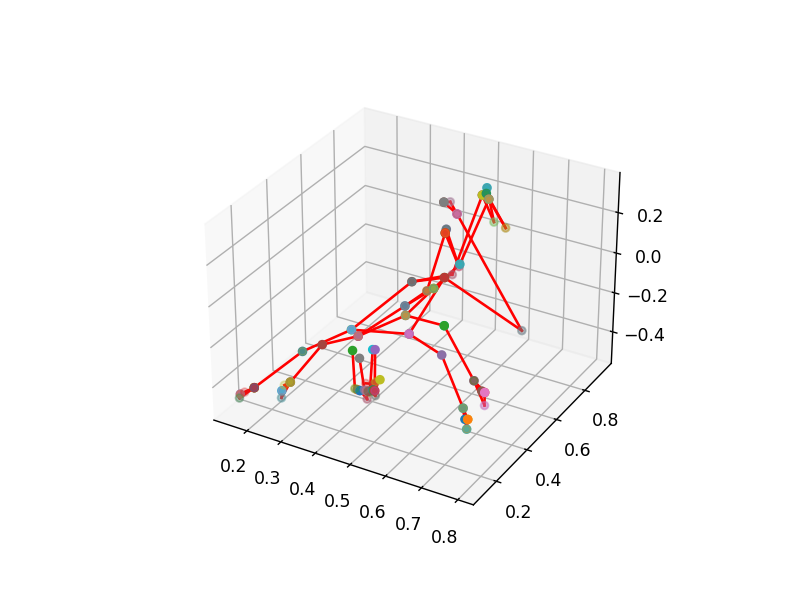

In [21]:
visualization(df1)
#

visualization(df2)

In [22]:
#realtime to detect the pose
camera_video = cv2.VideoCapture(0)

cv2.namedWindow('Human Pose', cv2.WINDOW_NORMAL)

while camera_video.isOpened():

    ok, frame = camera_video.read()

    if not ok:

        continue
    frame = cv2.flip(frame, 1)  
    frame_height, frame_width, _ =  frame.shape

    frame = cv2.resize(frame, (int(frame_width * (860 / frame_height)), 860))

    frame, landmarks = detectPose(frame, mp_pose.Pose(min_detection_confidence =0.5, min_tracking_confidence = 0.5), display=False)

    if landmarks:
        frame, _ = classifyPose(landmarks, frame, display=False)
    cv2.imshow('Human Pose', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

camera_video.release()
cv2.destroyAllWindows()

In [ ]:
def L2_normal(x):
    new_x = []
    for i in range(len(x)):
        z = list(x[i].values())/np.linalg.norm(list(x[i].values()))
        new_x.append(z)
        print(x[i])
    return new_x

In [ ]:
def diff_compare(x,y):
    average = []
    for i,j in zip(range(len(x)),range(len(y))):
        result = 1 - spatial.distance.cosine(x[i],y[j])
        average.append(result)
    score = math.sqrt(2*(1-round(Average(average),2)))
    print(Average(average))
    return score

In [ ]:
image = cv2.imread('Video/yoga25.jpg')
# cv2.imshow('window_name', image)
# cv2.waitKey(0) 
# cv2.destroyAllWindows() 
output_image, landmarks = detectPose(image, mp_pose.Pose(min_detection_confidence =0.5, min_tracking_confidence = 0.5),display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)